# 계층적 클러스터링

In [1]:
#트리 형태의 군집으로 나누는 방법
# 개별대상간의 거리에 의하여 가장 가까이에 있는 대상들로부터 시작하여 결합하여
# 트리 모양의 계층구조를 형성하는 방법

In [2]:
import pandas as pd

df = pd.read_csv('c:/workspace3/data/군집분석데이터.csv',encoding="ms949")
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Hannanum

hannanum = Hannanum() 
docs = []

for i in df['기사내용']:
    #명사 추출
    docs.append(hannanum.nouns(i))
    

In [4]:
#단어에 공백을 추가    

for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

#print(docs[:2]) 

In [6]:
vec = CountVectorizer()

X = vec.fit_transform(docs)

df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

df2.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


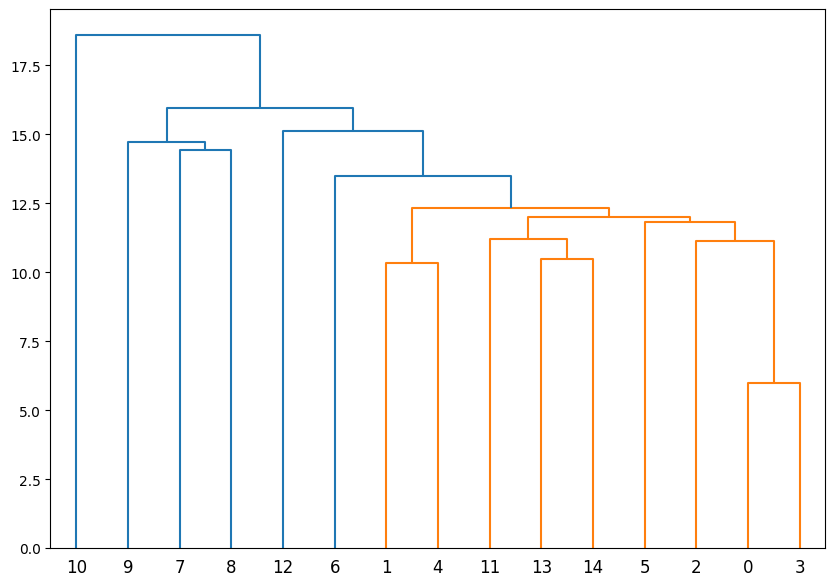

In [7]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

#계층적 클러스터링 : 하나의 데이터 샘플을 하나의 클러스터로 보고 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여가는 방법
#클러스터수를 3으로 설정

cluster = AgglomerativeClustering(n_clusters=3)
#                                     군집수
cluster.fit_predict(df2)  

#덴드로그램 출력, 트리를 나타내는 다이어그램

plt.figure(figsize=(10, 7))  
result=shc.linkage(df2)
shc.dendrogram(result)
plt.show()

In [8]:
cluster.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

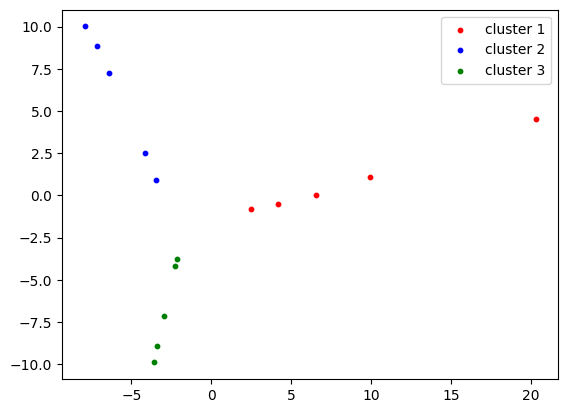

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#그래프 출력을 위해 주성분 분석

pca=PCA(n_components=2, random_state=10)

components=pca.fit_transform(df2)

df3=pd.DataFrame(data=components, columns=['component 1','component 2'])
df3.index=df['검색어']

plt.scatter(df3.iloc[cluster.labels_ == 0, 0], df3.iloc[cluster.labels_ == 0, 1], s=10, c='r', label='cluster 1')
plt.scatter(df3.iloc[cluster.labels_ == 1, 0], df3.iloc[cluster.labels_ == 1, 1], s=10, c='b', label='cluster 2')
plt.scatter(df3.iloc[cluster.labels_ == 2, 0], df3.iloc[cluster.labels_ == 2, 1], s=10, c='g', label='cluster 3')
plt.legend()
plt.show()